In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('clinvar_conflicting.csv')
df.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_3304\3240312335.py:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar_conflicting.csv')


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [3]:
df.shape

(65188, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [5]:
df.isna().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [6]:
df.drop(['CLNDISDBINCL' ,'CLNDNINCL' ,'CLNSIGINCL' ,'CLNVI' ,'SSR' ,'INTRON' ,'DISTANCE' 
         ,'BAM_EDIT' ,'SIFT' ,'PolyPhen' ,'MOTIF_NAME' ,'MOTIF_POS' ,'HIGH_INF_POS' 
         ,'MOTIF_SCORE_CHANGE' ,'BLOSUM62'] ,axis = 1 ,inplace = True)

In [7]:
df.dropna(subset=['MC'], inplace=True)
df.dropna(subset=['SYMBOL'], inplace=True)
df.dropna(subset=['Feature_type'], inplace=True)
df.dropna(subset=['Feature'], inplace=True)
df.dropna(subset=['BIOTYPE'], inplace=True)
df.dropna(subset=['STRAND'], inplace=True)
df.dropna(subset=['CADD_PHRED'], inplace=True)
df.dropna(subset=['CADD_RAW'], inplace=True)
df.isna().sum()

CHROM                  0
POS                    0
REF                    0
ALT                    0
AF_ESP                 0
AF_EXAC                0
AF_TGP                 0
CLNDISDB               0
CLNDN                  0
CLNHGVS                0
CLNVC                  0
MC                     0
ORIGIN                 0
CLASS                  0
Allele                 0
Consequence            0
IMPACT                 0
SYMBOL                 0
Feature_type           0
Feature                0
BIOTYPE                0
EXON                8750
cDNA_position       8745
CDS_position        9742
Protein_position    9742
Amino_acids         9758
Codons              9758
STRAND                 0
LoFtool             4031
CADD_PHRED             0
CADD_RAW               0
dtype: int64

In [8]:
df['LoFtool'] = (df['LoFtool'].fillna(method='ffill') + df['LoFtool'].fillna(method='bfill')) / 2
df.isna().sum()

CHROM                  0
POS                    0
REF                    0
ALT                    0
AF_ESP                 0
AF_EXAC                0
AF_TGP                 0
CLNDISDB               0
CLNDN                  0
CLNHGVS                0
CLNVC                  0
MC                     0
ORIGIN                 0
CLASS                  0
Allele                 0
Consequence            0
IMPACT                 0
SYMBOL                 0
Feature_type           0
Feature                0
BIOTYPE                0
EXON                8750
cDNA_position       8745
CDS_position        9742
Protein_position    9742
Amino_acids         9758
Codons              9758
STRAND                 0
LoFtool                6
CADD_PHRED             0
CADD_RAW               0
dtype: int64

In [9]:
df.dropna(subset=['LoFtool'], inplace=True)

In [10]:
df[['EXON_num', 'EXON_total']] = df['EXON'].str.split('/', expand=True)
df.drop(['EXON'] ,axis = 1 ,inplace = True)
df.isna().sum()

CHROM                  0
POS                    0
REF                    0
ALT                    0
AF_ESP                 0
AF_EXAC                0
AF_TGP                 0
CLNDISDB               0
CLNDN                  0
CLNHGVS                0
CLNVC                  0
MC                     0
ORIGIN                 0
CLASS                  0
Allele                 0
Consequence            0
IMPACT                 0
SYMBOL                 0
Feature_type           0
Feature                0
BIOTYPE                0
cDNA_position       8745
CDS_position        9742
Protein_position    9742
Amino_acids         9758
Codons              9758
STRAND                 0
LoFtool                0
CADD_PHRED             0
CADD_RAW               0
EXON_num            8750
EXON_total          8750
dtype: int64

In [11]:
df['cDNA_position'] = pd.to_numeric(df['cDNA_position'], errors='coerce')
df['cDNA_position'] = df['cDNA_position'].fillna( df['cDNA_position'].mean())

In [12]:
df['cDNA_position']

6        1858.0
7        2159.0
8        3562.0
9        3942.0
10       3842.0
          ...  
65183    4035.0
65184    3118.0
65185    1257.0
65186     822.0
65187     791.0
Name: cDNA_position, Length: 63417, dtype: float64

In [13]:
df['CDS_position'] = pd.to_numeric(df['CDS_position'], errors='coerce')
df['CDS_position'] = df['CDS_position'].fillna( df['CDS_position'].mean())

In [14]:
df['Protein_position'] = pd.to_numeric(df['Protein_position'], errors='coerce')
df['Protein_position'] = df['Protein_position'].fillna( df['Protein_position'].mean())

In [15]:
df.dropna(subset=['EXON_num'], inplace=True)
df.dropna(subset=['EXON_total'], inplace=True)
df.isna().sum()

CHROM                  0
POS                    0
REF                    0
ALT                    0
AF_ESP                 0
AF_EXAC                0
AF_TGP                 0
CLNDISDB               0
CLNDN                  0
CLNHGVS                0
CLNVC                  0
MC                     0
ORIGIN                 0
CLASS                  0
Allele                 0
Consequence            0
IMPACT                 0
SYMBOL                 0
Feature_type           0
Feature                0
BIOTYPE                0
cDNA_position          0
CDS_position           0
Protein_position       0
Amino_acids         1013
Codons              1013
STRAND                 0
LoFtool                0
CADD_PHRED             0
CADD_RAW               0
EXON_num               0
EXON_total             0
dtype: int64

In [16]:
most_frequent_value = df['Amino_acids'].mode()[0]
df['Amino_acids'] = df['Amino_acids'].fillna(most_frequent_value)

In [17]:
most_frequent_value

'A'

In [18]:
most_frequent_value = df['Codons'].mode()[0]
df['Codons'] = df['Codons'].fillna(most_frequent_value)

In [19]:
df.shape

(54667, 32)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54667 entries, 6 to 65187
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             54667 non-null  object 
 1   POS               54667 non-null  int64  
 2   REF               54667 non-null  object 
 3   ALT               54667 non-null  object 
 4   AF_ESP            54667 non-null  float64
 5   AF_EXAC           54667 non-null  float64
 6   AF_TGP            54667 non-null  float64
 7   CLNDISDB          54667 non-null  object 
 8   CLNDN             54667 non-null  object 
 9   CLNHGVS           54667 non-null  object 
 10  CLNVC             54667 non-null  object 
 11  MC                54667 non-null  object 
 12  ORIGIN            54667 non-null  int64  
 13  CLASS             54667 non-null  int64  
 14  Allele            54667 non-null  object 
 15  Consequence       54667 non-null  object 
 16  IMPACT            54667 non-null  object

In [21]:
df.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,cDNA_position,CDS_position,Protein_position,STRAND,LoFtool,CADD_PHRED,CADD_RAW
count,5.466700e+04,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000
mean,7.813390e+07,0.013105,0.013065,0.013823,1.366821,0.252145,5099.039379,4934.294960,1641.965084,-0.005543,0.347333,16.773399,2.812065
std,5.997168e+07,0.054491,0.056219,0.056307,6.113072,0.434248,13052.898482,13030.825419,4358.050504,0.999994,0.354567,10.936226,3.068189
min,1.387550e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000069,0.001000,-5.477391
25%,3.249672e+07,0.000000,0.000000,0.000000,1.000000,0.000000,932.000000,739.000000,244.000000,-1.000000,0.028900,8.433500,0.640694
50%,5.976330e+07,0.000000,0.000050,0.000000,1.000000,0.000000,1894.000000,1722.000000,566.000000,-1.000000,0.183000,15.650000,1.909314
75%,1.142756e+08,0.001100,0.001100,0.001400,1.000000,1.000000,4116.000000,4134.000000,1336.000000,1.000000,0.675000,24.800000,4.832487
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,1.000000,108207.000000,107961.000000,35987.000000,1.000000,1.000000,99.000000,46.556261


# model

In [27]:
df.drop([ 'CLNDISDB', 'CLNHGVS', 
         'MC', 'SYMBOL', 'Feature', 'Feature_type', 
         'BIOTYPE',  'CADD_RAW'], axis=1, inplace=True)

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        if df[column].apply(lambda x: isinstance(x, (int, float))).any():
            df[column] = df[column].astype(str)
        df[column] = label_encoder.fit_transform(df[column])
    else:
        pass


In [35]:
df

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,CLNVC,ORIGIN,...,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,EXON_num,EXON_total
6,0,3328358,223,33,0.0000,0.00000,0.0000,8199,5,1,...,1858.0,1600.0,534.0,461,366,1.0,0.10100,0.172,324,15
7,0,3328659,81,109,0.1523,0.13103,0.1060,8199,5,1,...,2159.0,1901.0,634.0,360,698,1.0,0.10100,23.000,324,15
8,0,3347452,160,0,0.0000,0.00357,0.0030,4582,5,1,...,3562.0,3304.0,1102.0,544,318,1.0,0.10100,11.360,56,15
9,0,5925304,160,0,0.0045,0.00231,0.0058,5973,5,1,...,3942.0,3674.0,1225.0,504,447,-1.0,0.02100,22.100,162,31
10,0,5926503,160,0,0.0019,0.00267,0.0010,5973,5,1,...,3842.0,3574.0,1192.0,429,206,-1.0,0.02100,26.100,153,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,22,154158201,223,64,0.0801,0.13923,0.1605,3553,5,1,...,4035.0,3864.0,1288.0,447,1235,-1.0,0.00158,0.105,45,26
65184,22,154159118,81,109,0.0020,0.00060,0.0013,8320,5,1,...,3118.0,2947.0,983.0,542,311,-1.0,0.00158,0.002,45,26
65185,22,154194886,81,109,0.0125,0.00370,0.0111,8320,5,1,...,1257.0,1086.0,362.0,26,1049,-1.0,0.00158,12.850,313,26
65186,22,154490187,223,33,0.0003,0.00034,0.0000,6112,5,1,...,822.0,543.0,181.0,497,541,-1.0,0.07079,0.130,94,19


In [37]:
for column in df.columns:
    if df[column].dtype == 'int32':
        df[column] = df[column].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54667 entries, 6 to 65187
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             54667 non-null  int64  
 1   POS               54667 non-null  int64  
 2   REF               54667 non-null  int64  
 3   ALT               54667 non-null  int64  
 4   AF_ESP            54667 non-null  float64
 5   AF_EXAC           54667 non-null  float64
 6   AF_TGP            54667 non-null  float64
 7   CLNDN             54667 non-null  int64  
 8   CLNVC             54667 non-null  int64  
 9   ORIGIN            54667 non-null  int64  
 10  CLASS             54667 non-null  int64  
 11  Allele            54667 non-null  int64  
 12  Consequence       54667 non-null  int64  
 13  IMPACT            54667 non-null  int64  
 14  cDNA_position     54667 non-null  float64
 15  CDS_position      54667 non-null  float64
 16  Protein_position  54667 non-null  float6

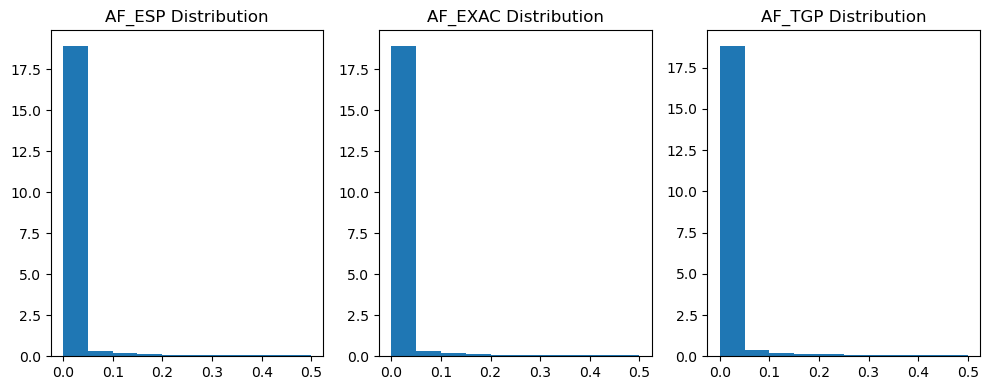

In [39]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 4))

# Plot histograms for each column

ax1.hist(df['AF_ESP'], bins=10, density=True)
ax1.set_title('AF_ESP Distribution')


ax2.hist(df['AF_EXAC'], bins=10, density=True)
ax2.set_title('AF_EXAC Distribution')


ax3.hist(df['AF_TGP'], bins=10, density=True)
ax3.set_title('AF_TGP Distribution')

plt.tight_layout()

plt.show()

In [40]:
allele_df = df[['AF_ESP', 'AF_EXAC', 'AF_TGP']]

allele_df.info()

# initiate count of three new variables

esp_zeros = 0
exac_zeros = 0
tgp_zeros = 0

# iterate through allele_df and print count of zeroes 

for column in allele_df.columns:
    column_values = allele_df[column].values
    zeros_count = len(column_values[column_values == 0])
    
    if column == 'AF_ESP':
        esp_zeros += zeros_count
    elif column == 'AF_EXAC':
        exac_zeros += zeros_count
    elif column == 'AF_TGP':
        tgp_zeros += zeros_count

print("Count of zeroes (missing values) in AF_ESP column:", esp_zeros)
print("Count of zeroes (missing values) in AF_EXAC column:", exac_zeros)
print("Count of zeroes (missing values) in AF_TGP column:", tgp_zeros)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54667 entries, 6 to 65187
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AF_ESP   54667 non-null  float64
 1   AF_EXAC  54667 non-null  float64
 2   AF_TGP   54667 non-null  float64
dtypes: float64(3)
memory usage: 1.7 MB
Count of zeroes (missing values) in AF_ESP column: 29656
Count of zeroes (missing values) in AF_EXAC column: 19213
Count of zeroes (missing values) in AF_TGP column: 31776


In [41]:
esp_missing = round((esp_zeros / len(allele_df)) * 100, 2)
exac_missing = round((exac_zeros / len(allele_df)) * 100, 2)
tgp_missing = round((tgp_zeros / len(allele_df)) * 100, 2)

print("Percentage of actual missing values in AF_ESP column:", esp_missing)
print("Percentage of actual missing values in AF_EXAC column:", exac_missing)
print("Percentage of actual missing values in AF_TGP column:", tgp_missing)

Percentage of actual missing values in AF_ESP column: 54.25
Percentage of actual missing values in AF_EXAC column: 35.15
Percentage of actual missing values in AF_TGP column: 58.13


In [43]:
for column in allele_df.columns:
    allele_df.loc[allele_df[column] == 0, column] = None

allele_df

,AF_ESP,AF_EXAC,AF_TGP
6,NaN,NaN,NaN
7,0.1523,0.13103,0.1060
8,NaN,0.00357,0.0030
9,0.0045,0.00231,0.0058
10,0.0019,0.00267,0.0010
...,...,...,...
65183,0.0801,0.13923,0.1605
65184,0.0020,0.00060,0.0013
65185,0.0125,0.00370,0.0111
65186,0.0003,0.00034,NaN


In [51]:
# Methods for filling null values
methods = ['mean', 'median', 'interpolation']

# Calculate skewness and kurtosis for original DataFrame
original_skewness = allele_df.skew()
original_kurtosis = allele_df.kurtosis()

results = {}

for method in methods:
    if method == 'mean':
        filled_df = allele_df.fillna(allele_df.mean())
    elif method == 'median':
        filled_df = allele_df.fillna(allele_df.median())
    elif method == 'interpolation':
        filled_df = allele_df.interpolate()
    
    # Assign the filled DataFrame back to allele_df
    allele_df = filled_df
    
    # Calculate skewness and kurtosis
    skewness = filled_df.skew()
    kurtosis = filled_df.kurtosis()
    
    # Store the results in the dictionary
    results[method] = {'skewness': skewness, 'kurtosis': kurtosis}

# Print the results
for method in methods:
    print(f"DataFrame with {method.capitalize()}-Filled Null Values:")
    print("Skewness:\n", results[method]['skewness'])
    print("Kurtosis:\n", results[method]['kurtosis'])
    print()


DataFrame with Mean-Filled Null Values:
Skewness:
 AF_ESP     4.522179
AF_EXAC    5.042665
AF_TGP     4.224749
dtype: float64
Kurtosis:
 AF_ESP     22.635620
AF_EXAC    27.536954
AF_TGP     19.701495
dtype: float64

DataFrame with Median-Filled Null Values:
Skewness:
 AF_ESP     4.522179
AF_EXAC    5.042665
AF_TGP     4.224749
dtype: float64
Kurtosis:
 AF_ESP     22.635620
AF_EXAC    27.536954
AF_TGP     19.701495
dtype: float64

DataFrame with Interpolation-Filled Null Values:
Skewness:
 AF_ESP     4.522179
AF_EXAC    5.042665
AF_TGP     4.224749
dtype: float64
Kurtosis:
 AF_ESP     22.635620
AF_EXAC    27.536954
AF_TGP     19.701495
dtype: float64



In [56]:
allele_df

,AF_ESP,AF_EXAC,AF_TGP
6,0.020476,0.016676,0.02332
7,0.152300,0.131030,0.10600
8,0.078400,0.003570,0.00300
9,0.004500,0.002310,0.00580
10,0.001900,0.002670,0.00100
...,...,...,...
65183,0.080100,0.139230,0.16050
65184,0.002000,0.000600,0.00130
65185,0.012500,0.003700,0.01110
65186,0.000300,0.000340,0.00595


In [57]:
df[['AF_ESP', 'AF_EXAC', 'AF_TGP']]

,AF_ESP,AF_EXAC,AF_TGP
6,0.0000,0.00000,0.0000
7,0.1523,0.13103,0.1060
8,0.0000,0.00357,0.0030
9,0.0045,0.00231,0.0058
10,0.0019,0.00267,0.0010
...,...,...,...
65183,0.0801,0.13923,0.1605
65184,0.0020,0.00060,0.0013
65185,0.0125,0.00370,0.0111
65186,0.0003,0.00034,0.0000


In [58]:
df[['AF_ESP', 'AF_EXAC', 'AF_TGP']]=allele_df

In [59]:
df[['AF_ESP', 'AF_EXAC', 'AF_TGP']]

,AF_ESP,AF_EXAC,AF_TGP
6,0.020476,0.016676,0.02332
7,0.152300,0.131030,0.10600
8,0.078400,0.003570,0.00300
9,0.004500,0.002310,0.00580
10,0.001900,0.002670,0.00100
...,...,...,...
65183,0.080100,0.139230,0.16050
65184,0.002000,0.000600,0.00130
65185,0.012500,0.003700,0.01110
65186,0.000300,0.000340,0.00595


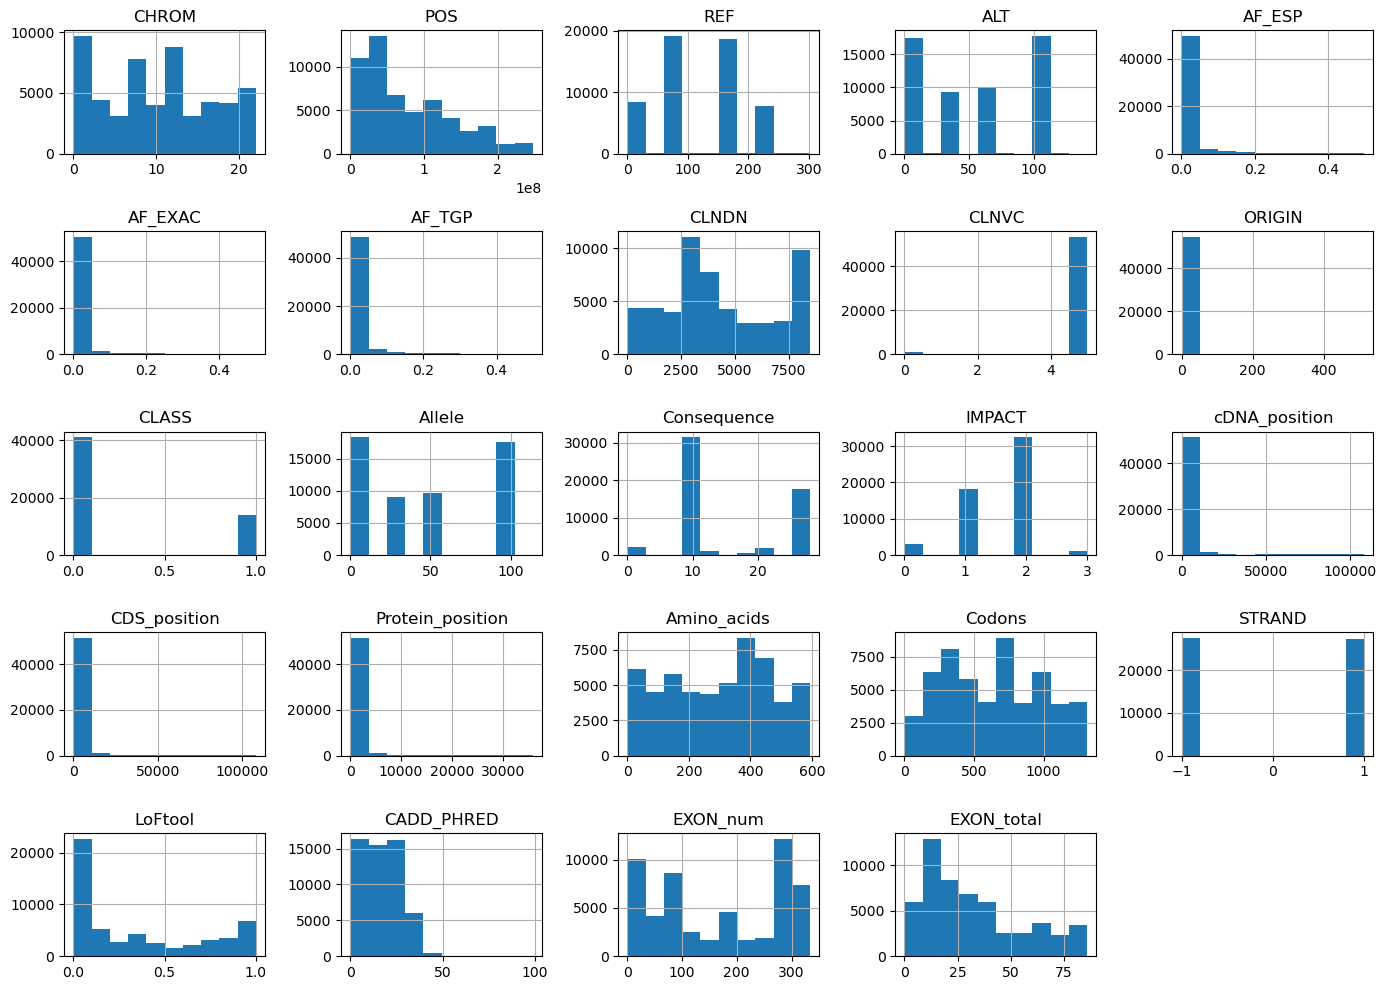

In [60]:
df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

In [61]:
df['AF_avg'] = (df['AF_ESP'] + df['AF_EXAC'] + df['AF_TGP']) / 3

In [62]:
df

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,CLNVC,ORIGIN,...,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,EXON_num,EXON_total,AF_avg
6,0,3328358,223,33,0.020476,0.016676,0.02332,8199,5,1,...,1600.0,534.0,461,366,1.0,0.10100,0.172,324,15,0.020157
7,0,3328659,81,109,0.152300,0.131030,0.10600,8199,5,1,...,1901.0,634.0,360,698,1.0,0.10100,23.000,324,15,0.129777
8,0,3347452,160,0,0.078400,0.003570,0.00300,4582,5,1,...,3304.0,1102.0,544,318,1.0,0.10100,11.360,56,15,0.028323
9,0,5925304,160,0,0.004500,0.002310,0.00580,5973,5,1,...,3674.0,1225.0,504,447,-1.0,0.02100,22.100,162,31,0.004203
10,0,5926503,160,0,0.001900,0.002670,0.00100,5973,5,1,...,3574.0,1192.0,429,206,-1.0,0.02100,26.100,153,31,0.001857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,22,154158201,223,64,0.080100,0.139230,0.16050,3553,5,1,...,3864.0,1288.0,447,1235,-1.0,0.00158,0.105,45,26,0.126610
65184,22,154159118,81,109,0.002000,0.000600,0.00130,8320,5,1,...,2947.0,983.0,542,311,-1.0,0.00158,0.002,45,26,0.001300
65185,22,154194886,81,109,0.012500,0.003700,0.01110,8320,5,1,...,1086.0,362.0,26,1049,-1.0,0.00158,12.850,313,26,0.009100
65186,22,154490187,223,33,0.000300,0.000340,0.00595,6112,5,1,...,543.0,181.0,497,541,-1.0,0.07079,0.130,94,19,0.002197


In [64]:
corr_class = df[['CLASS', 'AF_avg', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'Consequence',
               'Codons', 'STRAND', 'LoFtool']]
corr_class.corr()

,CLASS,AF_avg,AF_ESP,AF_EXAC,AF_TGP,Consequence,Codons,STRAND,LoFtool
CLASS,1.000000,-0.119738,-0.105050,-0.115763,-0.111291,-0.014360,-0.005657,-0.035453,0.001238
AF_avg,-0.119738,1.000000,0.931699,0.927685,0.914353,0.078565,0.051226,-0.014065,0.029864
AF_ESP,-0.105050,0.931699,1.000000,0.822442,0.766123,0.071745,0.046672,-0.013738,0.024401
AF_EXAC,-0.115763,0.927685,0.822442,1.000000,0.758654,0.083308,0.055125,-0.012102,0.030306
AF_TGP,-0.111291,0.914353,0.766123,0.758654,1.000000,0.063552,0.040793,-0.013137,0.028128
Consequence,-0.014360,0.078565,0.071745,0.083308,0.063552,1.000000,0.423388,0.003850,-0.015411
Codons,-0.005657,0.051226,0.046672,0.055125,0.040793,0.423388,1.000000,0.003555,-0.016372
STRAND,-0.035453,-0.014065,-0.013738,-0.012102,-0.013137,0.003850,0.003555,1.000000,-0.153358
LoFtool,0.001238,0.029864,0.024401,0.030306,0.028128,-0.015411,-0.016372,-0.153358,1.000000


In [66]:
df[['AF_avg',  'AF_ESP', 'AF_EXAC', 'AF_TGP']].corr()

,AF_avg,AF_ESP,AF_EXAC,AF_TGP
AF_avg,1.000000,0.931699,0.927685,0.914353
AF_ESP,0.931699,1.000000,0.822442,0.766123
AF_EXAC,0.927685,0.822442,1.000000,0.758654
AF_TGP,0.914353,0.766123,0.758654,1.000000


# Logistic Regression

In [74]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df_three = df.copy()
df_three.drop(['AF_ESP', 'AF_TGP', 'AF_EXAC'], axis=1, inplace=True)
X = df_three.drop('CLASS', axis=1)
y = df['CLASS']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7506859337845253
Precision: 0.7506859337845253
Recall: 0.7506859337845253
F1 Score: 0.7506859337845253
Confusion Matrix:
[[8207    5]
 [2721    1]]


D:\program\anconda\anan\envs\y\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
#in all data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X = df.drop('CLASS', axis=1)
y = df['CLASS']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7505944759465886
Precision: 0.7505944759465886
Recall: 0.7505944759465886
F1 Score: 0.7505944759465886
Confusion Matrix:
[[8206    6]
 [2721    1]]


D:\program\anconda\anan\envs\y\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Get the feature importances
importances = rf_classifier.feature_importances_

# Get the indices of the most important features (top k features)
k = 10
top_k_indices = importances.argsort()[-k:][::-1]

# Get the names of the selected features
selected_features = X.columns[top_k_indices]

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Selected Features:")
for feature in selected_features:
    print(feature)



Accuracy: 0.765044814340589
Mean Squared Error (MSE): 0.234955185659411
R-squared (R2): -0.25662620569600647
Selected Features:
AF_EXAC
CLNDN
AF_avg
POS
CADD_PHRED
AF_TGP
AF_ESP
cDNA_position
Codons
CDS_position


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
X = df[['AF_ESP', 'AF_TGP', 'AF_EXAC']]
y = df['CLASS']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Get the feature importances
importances = rf_classifier.feature_importances_

# Get the indices of the most important features (top k features)
k = 10
top_k_indices = importances.argsort()[-k:][::-1]

# Get the names of the selected features
selected_features = X.columns[top_k_indices]

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Selected Features:")
for feature in selected_features:
    print(feature)


Accuracy: 0.7184013169928662
Mean Squared Error (MSE): 0.2815986830071337
R-squared (R2): -0.5060926770486587
Selected Features:
AF_EXAC
AF_TGP
AF_ESP


# Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming df is already defined
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Get the feature importances
importances = gb_classifier.feature_importances_

# Get the indices of the most important features (top k features)
k = 10
top_k_indices = importances.argsort()[-k:][::-1]

# Get the names of the selected features
selected_features = X.columns[top_k_indices]

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Selected Features:")
for feature in selected_features:
    print(feature)



Accuracy: 0.7576367294677154
Selected Features:
AF_EXAC
CLNDN
AF_TGP
IMPACT
LoFtool
POS
CADD_PHRED
Consequence
AF_avg
ORIGIN


# Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

X = df.drop('CLASS', axis=1)
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)


r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)


R-squared (R2): 0.029176539366035814


# KNeighborsRegressor

In [89]:
from sklearn.neighbors import KNeighborsRegressor
X = df.drop('CLASS', axis=1)
y = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5) 
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)

R-squared (R2): -0.11985988140149395


# cnn

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Assuming df is already defined
X = df.drop('CLASS', axis=1)
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Convert predictions to binary values (assuming binary classification)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)


342/342 [==============================] - 1s 2ms/step
Accuracy: 0.7401682824218035


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Assuming df is already defined
X = df.drop('CLASS', axis=1)
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer, sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate the model on the testing set
_, accuracy = model.evaluate(X_test_scaled, y_test)

print("Accuracy:", accuracy)


342/342 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.7510
Accuracy: 0.7509602904319763


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Assuming df is already defined
X = df.drop('CLASS', axis=1)
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer, sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate the model on the testing set
_, accuracy = model.evaluate(X_test_scaled, y_test)

print("Accuracy:", accuracy)


342/342 [==============================] - 1s 3ms/step - loss: 0.5128 - accuracy: 0.7508
Accuracy: 0.7507773637771606


a